In [78]:
import pathlib
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [79]:
sns.set_style('white')

In [80]:
PRJ='PRJNA573298'
BASE_PATH='/mnt/1TB_0/Data/Assembly/'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
ITERATION=4

In [81]:
df_accessions=pd.read_csv(PLOT_PATH+'04_Accessions.tsv', sep='\t')

In [82]:
df_accessions.head()

,Accession,Code,Description
0,MT121216.1,Pangolin CoV MP789,"Pangolin coronavirus isolate MP789, complete g..."
1,MW505906.1,Pangolin respirovirus M5,"Pangolin respirovirus isolate M5, complete genome"
2,NC_001416.1,Enterobacteria phage lambda,"Enterobacteria phage lambda, complete genome"
3,NC_001450.1,Equine infectious anemia virus,"Equine infectious anemia virus, complete genome"
4,NC_001479.1,Encephalomyocarditis virus,"Encephalomyocarditis virus, complete genome"


In [83]:
df_accessions['Accession']=df_accessions['Accession'].str.strip()

In [84]:
df_datasets=pd.read_csv(PLOT_PATH+'02_Datasets.tsv', sep='\t')

In [85]:
df_datasets.head()

,Reference,Institute,BioProject,SRP,Experiment,SRA,Sample,Submitted by,Submitted,Updated,...,Source,Selection,Layout,Spots,Dataset,Machine + flowcell id,Additional machine id,sha256sum,SARS-CoV-2-like Coronavirus Identified and Cited?,Notes
0,Liu et al. 2019,GIABR,PRJNA573298,NaN,SRX6893158,SRR10168373,SAMN12809957,Liu Ping,2019-09-20,NaN,...,GENOMIC,RANDOM,PAIRED,"16,491,648",lung13.1.fq,@A00192:246:HHYMLDSXX:2:2631:28565:19272,NaN,NaN,NaN,NaN
1,Liu et al. 2019,GIABR,PRJNA573298,NaN,SRX6893157,SRR10168374,SAMN12809956,Liu Ping,2019-09-20,NaN,...,NaN,NaN,PAIRED,"9,275,501",lung12.1.fq,@A00192:246:HHYMLDSXX:2:1310:5936:1251,NaN,NaN,Lam et al. 2020,NaN
2,Liu et al. 2019,GIABR,PRJNA573298,SRP223042,SRX6893156,SRR10168375,SAMN12809955,Liu Ping,2019-09-20,2019-09-23,...,NaN,NaN,PAIRED,"22,220,187",lung11.1.fq,@A00192:246:HHYMLDSXX:1:2107:12635:15515,NaN,NaN,Liu et al. 2020; Xiao et al. 2020,NaN
3,Liu et al. 2019,GIABR,PRJNA573298,SRP223042,SRX6893155,SRR10168376,SAMN12809954,Liu Ping,2019-09-20,2019-09-23,...,NaN,NaN,PAIRED,"18,067,615",lung09.1.fq,@A00192:246:HHYMLDSXX:1:2401:25753:6543,NaN,NaN,Liu et al. 2020; Lam et al. 2020,NaN
4,Liu et al. 2019,GIABR,PRJNA573298,SRP223042,SRX6893154,SRR10168377,SAMN12809953,Liu Ping,2019-09-20,2019-09-23,...,NaN,NaN,PAIRED,"16,414,925",lung08.1.fq,@A00184:351:HHYL7DSXX:4:2440:4101:20462,NaN,NaN,"Liu et al. 2020; Lam et al. 2020, Xiao et al. ...",NaN


In [86]:
df=pd.read_csv(PLOT_PATH+'Pangolin_Data-bowtie2_core_3.csv')

In [87]:
bio_list=df['BioProject'].tolist()

In [88]:
set(bio_list)

{'PRJNA573298', 'PRJNA606875', 'PRJNA607174', 'PRJNA610466', 'PRJNA686836'}

In [89]:
df_PRJNA573298_species=pd.read_csv(PLOT_PATH+'PRJNA573298_nt_k141_magicBLAST_species_df.csv')
prjcd='PRJNA606875'
df_PRJNA606875_species=pd.read_csv(f'/mnt/1TB_0/Data/Assembly/{prjcd}/general_plots/'+f'{prjcd}_nt_k141_magicBLAST_species_df.csv')
prjcd='PRJNA607174'
df_PRJNA607174_species=pd.read_csv(f'/mnt/1TB_0/Data/Assembly/{prjcd}/general_plots/'+f'{prjcd}_nt_k141_magicBLAST_species_df.csv')
prjcd='PRJNA610466'
df_PRJNA610466_species=pd.read_csv(f'/mnt/1TB_0/Data/Assembly/PRJNA610466/general_plots/PRJN610466_nt_k141_magicBLAST_species_df.csv')
prjcd='PRJNA686836'
df_PRJNA686836_species=pd.read_csv('/mnt/1TB_0/Data/Assembly/PRJNA686836/SRR13285085/magic_blast/SRR13285085_nt_k59_magicBLAST_species_df.csv')

In [90]:
set(df_PRJNA610466_species['SRA'].tolist())

{'SRR11306687',
 'SRR11306688',
 'SRR11306689',
 'SRR11306690',
 'SRR11306691',
 'SRR11306692',
 'SRR11306693',
 'SRR11306694',
 'SRR11306695',
 'SRR11306696',
 'SRR11306697',
 'SRR11306698',
 'SRR11306699',
 'SRR11306700',
 'SRR11306701',
 'SRR11306702',
 'SRR11306703',
 'SRR11306704',
 'SRR11306705',
 'SRR11306706'}

In [91]:
df_PRJNA606875_species.head()

,Unnamed: 0,SRA,Name,count,pct_matched
0,0,SRR11093265,human,0,0.0
1,1,SRR11093265,monkey,0,0.0
2,2,SRR11093265,pangolin,0,0.0
3,3,SRR11093265,mouse,0,0.0
4,4,SRR11093265,pig,0,0.0


In [92]:
frames=[df_PRJNA573298_species,df_PRJNA606875_species,df_PRJNA607174_species,df_PRJNA610466_species,df_PRJNA686836_species]
df_sp= pd.concat(frames)

In [93]:
df=df.drop(columns='BioProject')

In [94]:
col_list=df.columns.values.tolist()

In [95]:
type(col_list)

list

In [96]:
col_codes=[]
for c in col_list:
    col_codes.append(c.split()[0])
df.columns=col_codes

In [97]:
df.head()

,SRA,MT121216.1,MW505906.1,NC_001450.1,NC_001479.1,NC_001500.1,NC_001501.1,NC_001502.1,NC_001669.1,NC_001702.1,...,NC_032852.1,NC_038399.1,NC_038495.1,NC_038668.1,NC_038923.1,NC_042057.1,NC_043382.1,NC_044948.1,NC_001781.1,NC_001499.1
0,SRR10168373,NaN,2.0,2.0,3780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SRR10168374,4.0,4.0,NaN,601.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SRR10168375,7.0,145.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SRR10168376,35.0,15011.0,2.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SRR10168377,984.0,4306.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
amplicons_index=df[df.SRA == 'SRR13053879'].index[0]

In [99]:
df = df[df.SRA != 'SRR13053879']

In [100]:
df_m=df_sp.loc[df_sp['Name'] == 'mouse']

In [101]:
df_m.head()

,Unnamed: 0,SRA,Name,count,pct_matched
3,3,SRR10168373,mouse,53,1.22
16,3,SRR10168374,mouse,3,0.06
29,3,SRR10168375,mouse,79,0.18
42,3,SRR10168376,mouse,51,0.22
55,3,SRR10168377,mouse,636,3.25


In [102]:
df_h=df_sp.loc[df_sp['Name'] == 'human']

In [103]:
len(df_m['SRA'].tolist())

59

In [104]:
len(df['SRA'].tolist())

59

In [105]:
np.setdiff1d(df['SRA'].tolist(),df_m['SRA'].tolist())

array([], dtype='<U11')

In [106]:
df['mouse']=df_m['count'].tolist()
df['human']=df_h['count'].tolist()

In [107]:
df_data=df.drop(columns='SRA')

In [108]:
data=df_data.to_numpy()

In [109]:
def get_samples(y_labels, df_datasets):
    y_names=[]
    for sra in y_labels:
        y_names.append(df_datasets.loc[df_datasets['SRA'] == sra, 'Name'].values[0])
    return y_names

In [110]:
def get_accessions(x_labels, df_accessions):
    x_codes=[]
    for accession in x_labels:
        if accession=='Influenza' or accession=='human' or accession=='mouse':
            x_codes.append(accession)
        else:
            x_codes.append(df_accessions.loc[df_accessions['Accession'] == accession, 'Code'].values[0])
    return x_codes

In [111]:
x_labels=list(df_data.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
y_labels=df['SRA'].tolist()
y_names=get_samples(y_labels, df_datasets)

In [112]:
plot_data = np.ma.masked_equal(data[:,:], 0)

In [113]:
df_coded=df.copy()
sra_x_codes=x_codes.copy()
sra_x_codes.insert(0,'SRA')
df_coded.columns=sra_x_codes

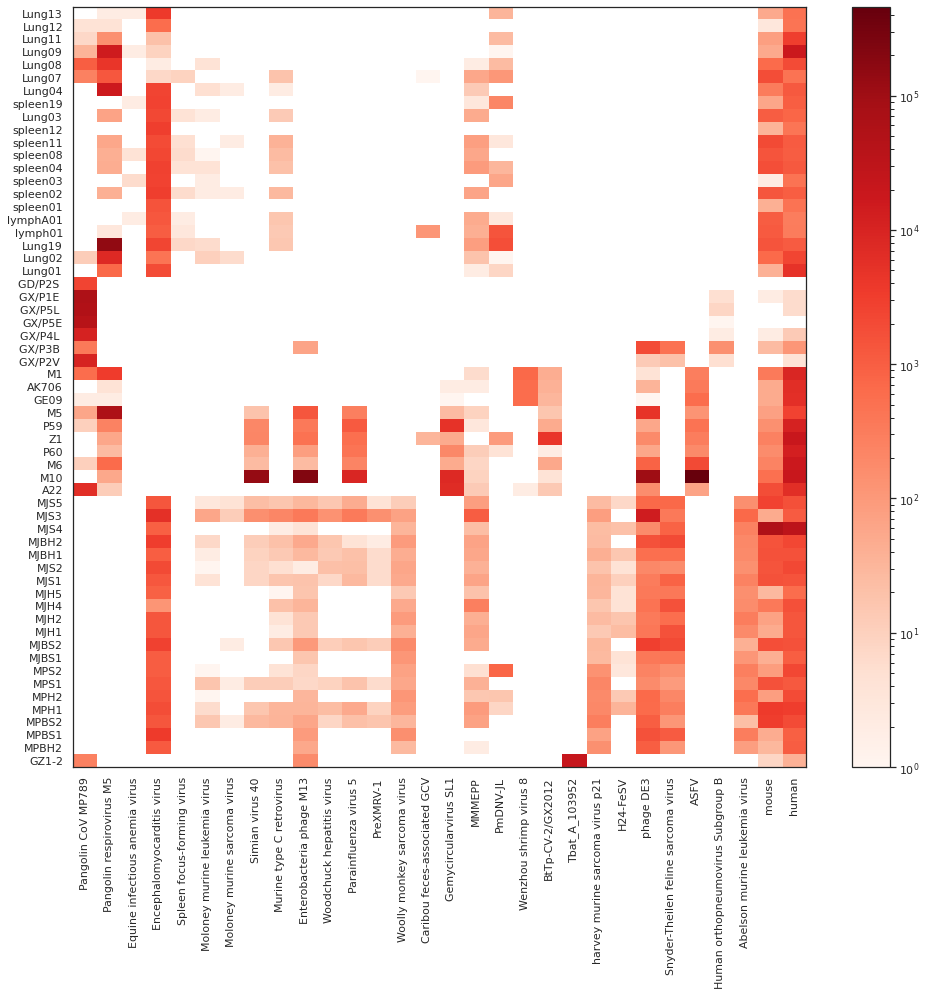

In [114]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,14))
img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", aspect='auto',norm=matplotlib.colors.LogNorm())
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)
fig.colorbar(img)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Pangolin_SRA_viruses_coded_{ITERATION}.png")

In [115]:
#sns.set(rc={"figure.figsize":(14, 14)})
#sns.pairplot(df, diag_kind='kde')  

In [116]:
df_coded.columns

Index(['SRA', 'Pangolin CoV MP789', 'Pangolin respirovirus M5',
       'Equine infectious anemia virus', 'Encephalomyocarditis virus',
       'Spleen focus-forming virus', 'Moloney murine leukemia virus',
       'Moloney murine sarcoma virus', 'Simian virus 40',
       'Murine type C retrovirus', 'Enterobacteria phage M13',
       'Woodchuck hepatitis virus', 'Parainfluenza virus 5', 'PreXMRV-1',
       'Woolly monkey sarcoma virus', 'Caribou feces-associated GCV',
       'Gemycircularvirus SL1', 'MMMEPP', 'PmDNV-JL', 'Wenzhou shrimp virus 8',
       'BtTp-CV-2/GX2012', 'Tbat_A_103952', 'harvey murine sarcoma virus p21',
       'H24-FeSV', 'phage DE3', 'Snyder-Theilen feline sarcoma virus', 'ASFV',
       'Human orthopneumovirus Subgroup B', 'Abelson murine leukemia virus',
       'mouse', 'human'],
      dtype='object')

# Correlation matrix

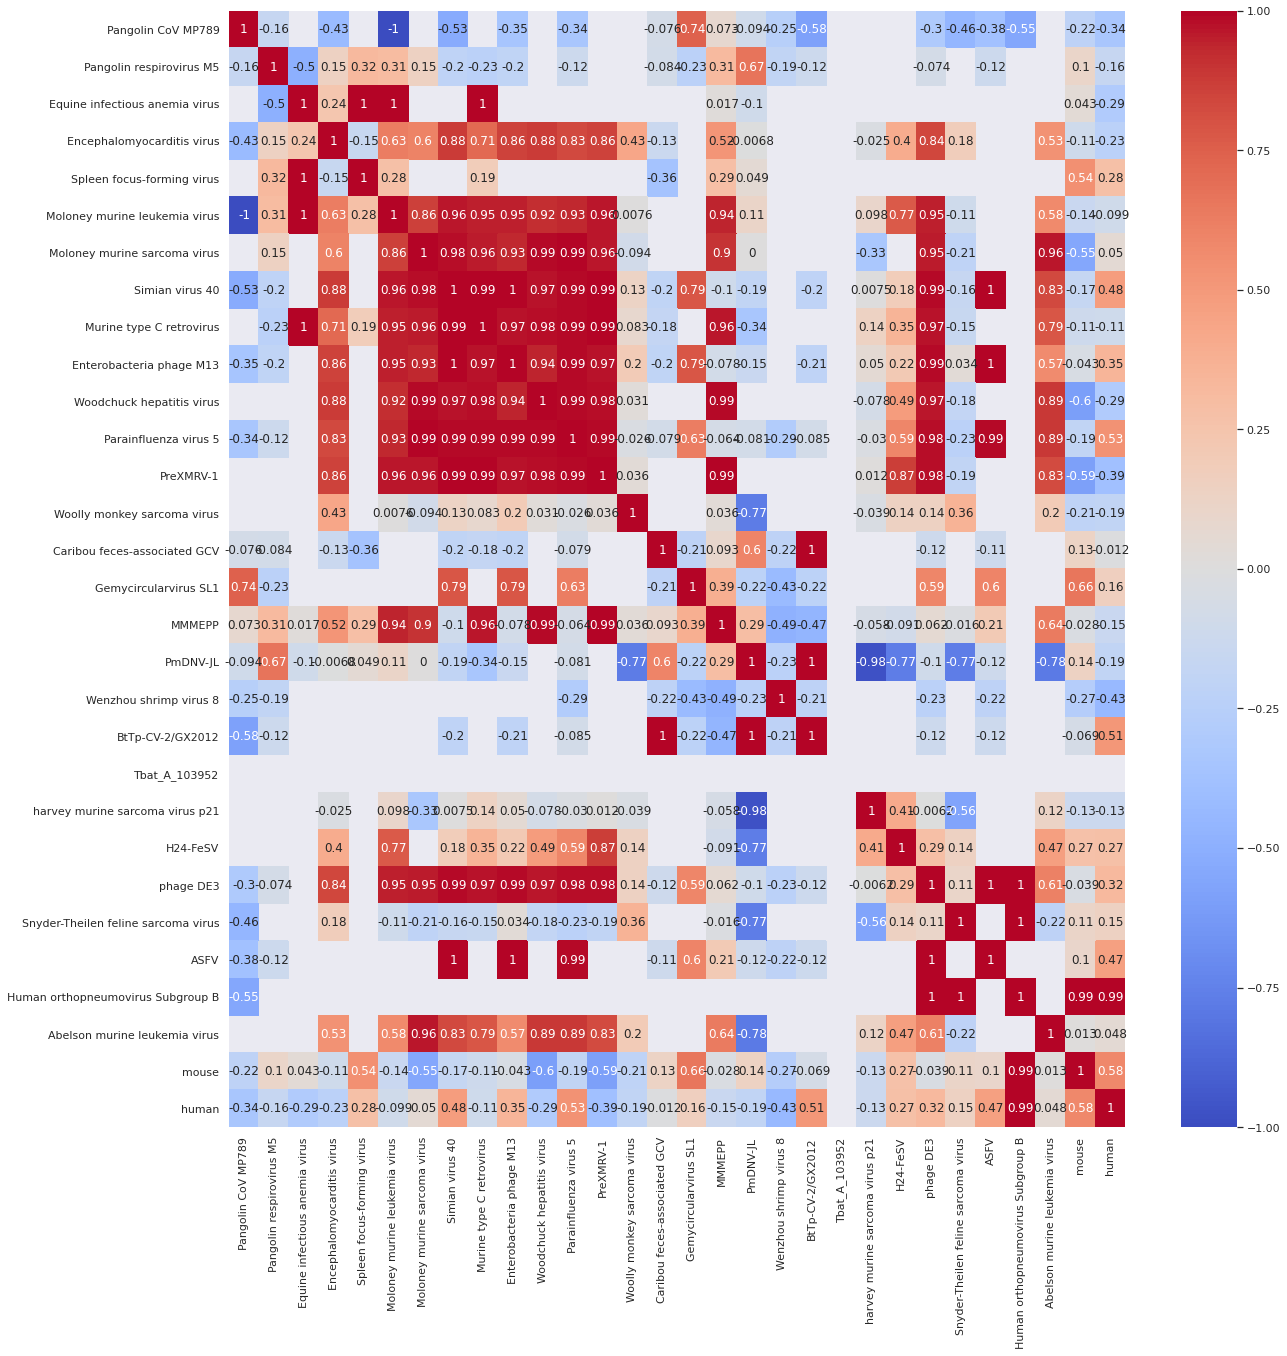

In [117]:
sns.set(rc={"figure.figsize":(19, 19)})
sns_plot=sns.heatmap(df_coded.corr(method='pearson'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
fig.tight_layout()
fig.savefig(PLOT_PATH+f"Pangolin_SRA_viruses_pearson_coded_{ITERATION}.png")

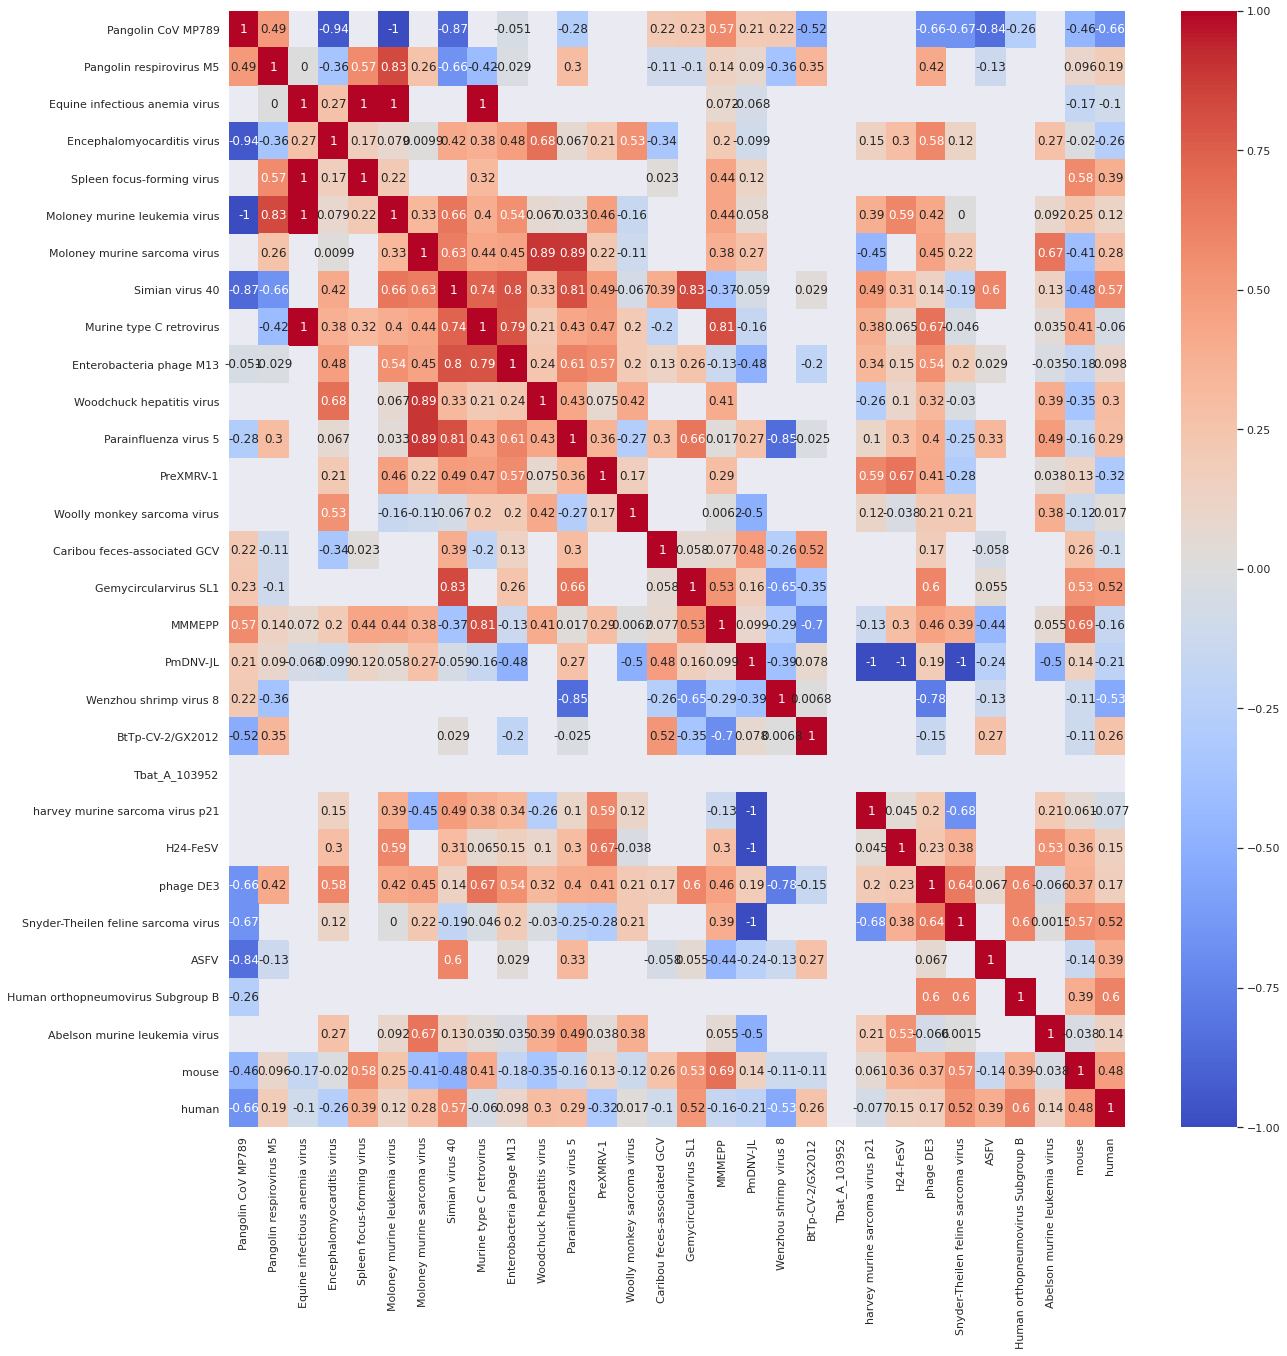

In [118]:
sns.set(rc={"figure.figsize":(19, 19)})
sns_plot=sns.heatmap(df_coded.corr(method='spearman'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Pangolin_SRA_viruses_spearman_coded_{ITERATION}.png")

## PRJNA573298

In [119]:
df_species=pd.read_csv(PLOT_PATH+'PRJNA573298_nt_k141_magicBLAST_species_df.csv')

In [120]:
df_species=df_species.drop(columns=['Unnamed: 0'])

In [121]:
df_mice = df_species[df_species['Name'].str.contains('mouse')]
df_human = df_species[df_species['Name'].str.contains('human')]

In [126]:
del bio_list[amplicons_index]

In [129]:
assert len(df) == len(bio_list)

In [128]:
df['BioProject']=bio_list

In [130]:
df_Liu=df[df["BioProject"] == 'PRJNA573298'] 

In [131]:
assert df_Liu['SRA'].tolist()==df_mice['SRA'].tolist()

In [132]:
df_Liu=df_Liu.drop(columns=['BioProject','SRA'])

In [133]:
col_list=df_Liu.columns.values.tolist()

In [134]:
col_codes=[]
for c in col_list:
    col_codes.append(c.split()[0])
df_Liu.columns=col_codes

In [135]:
x_labels=list(df_Liu.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
df_Liu.columns=x_codes

In [136]:
df_Liu['mouse']=df_mice['count'].tolist()
df_Liu['human']=df_human['count'].tolist()

In [137]:
df_Liu=df_Liu.replace(0,np.nan).dropna(axis=1,how="all")

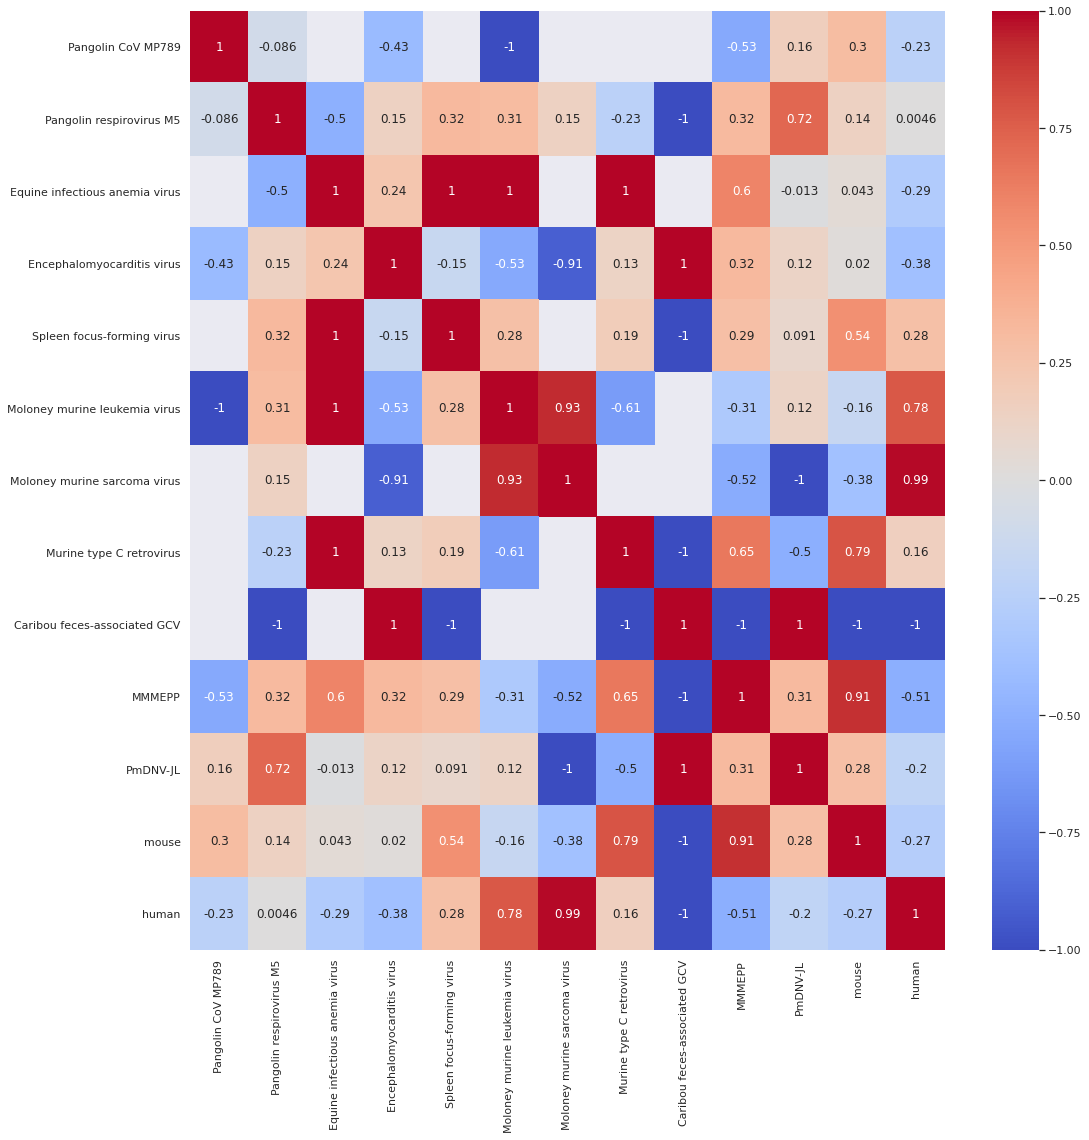

In [138]:
sns.set(rc={"figure.figsize":(16, 16)})
sns_plot=sns.heatmap(df_Liu.corr(method='pearson'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Liu_2019_viruses_pearson_{ITERATION}.png")

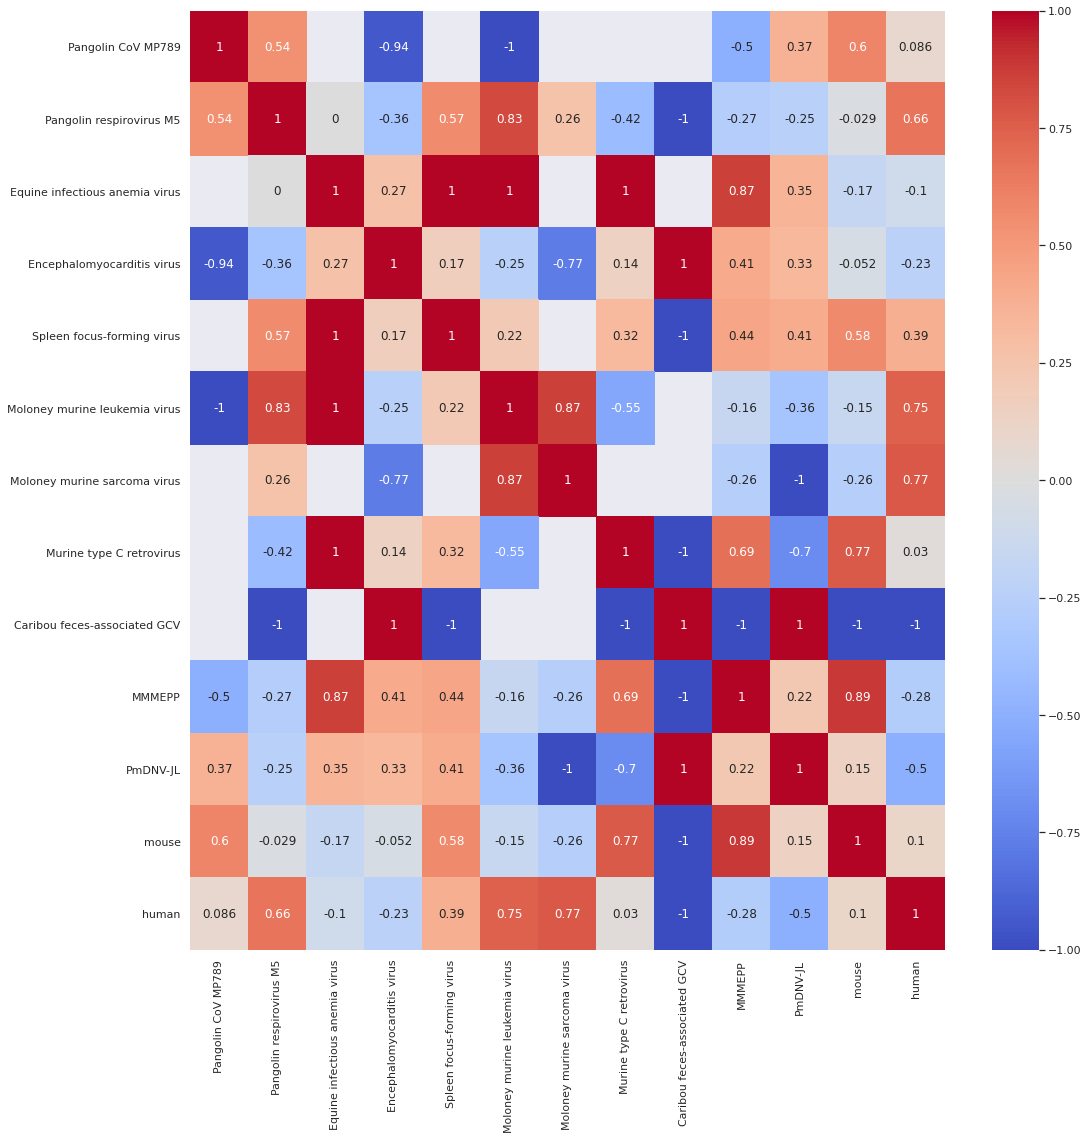

In [139]:
sns.set(rc={"figure.figsize":(16, 16)})
sns_plot=sns.heatmap(df_Liu.corr(method='spearman'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Liu_2019_viruses_spearman_{ITERATION}.png")

## PRJNA607174

In [140]:
df_species=pd.read_csv(f'{BASE_PATH}PRJNA607174/general_plots/PRJNA607174_nt_k141_magicBLAST_species_df.csv')

In [141]:
df_species=df_species.drop(columns=['Unnamed: 0'])

In [142]:
df_mice = df_species[df_species['Name'].str.contains('mouse')]
df_human = df_species[df_species['Name'].str.contains('human')]

In [143]:
df_Xiao=df[df["BioProject"] == 'PRJNA607174'] 

In [144]:
df_Xiao=df_Xiao[~df_Xiao.SRA.str.contains("SRR13053879")]

In [145]:
assert df_Xiao['SRA'].tolist()==df_mice['SRA'].tolist()

In [146]:
df_Xiao=df_Xiao.drop(columns=['BioProject','SRA'])

In [147]:
col_list=df_Xiao.columns.values.tolist()

In [148]:
col_codes=[]
for c in col_list:
    col_codes.append(c.split()[0])
df_Xiao.columns=col_codes

In [149]:
x_labels=list(df_Xiao.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
df_Xiao.columns=x_codes

In [150]:
df_Xiao['mouse']=df_mice['count'].tolist()
df_Xiao['human']=df_human['count'].tolist()

In [151]:
df_Xiao=df_Xiao.replace(0,np.nan).dropna(axis=1,how="all")

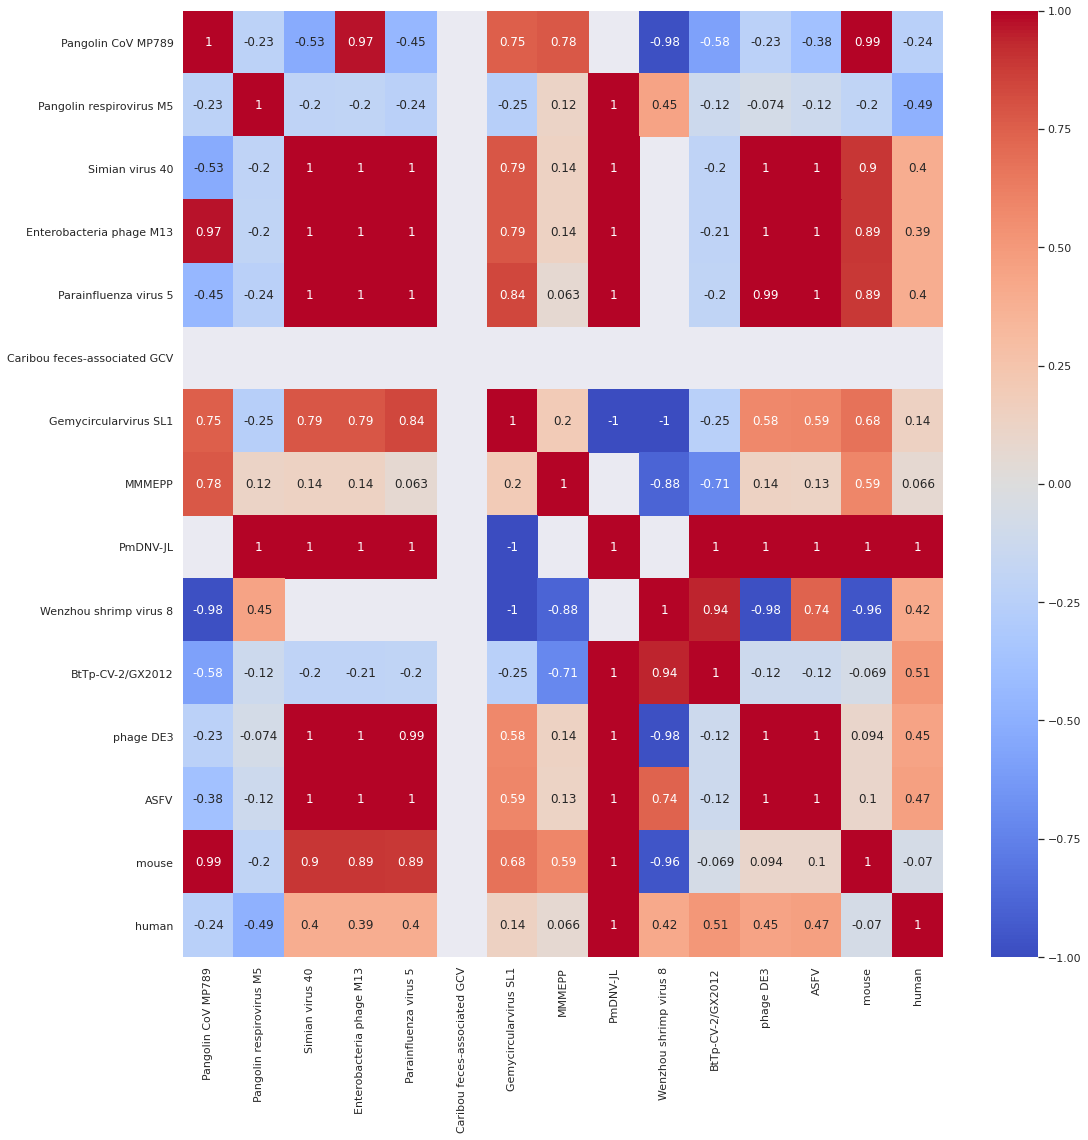

In [152]:
sns.set(rc={"figure.figsize":(16, 16)})
sns_plot=sns.heatmap(df_Xiao.corr(method='pearson'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Xiao_2020_viruses_pearson_{ITERATION}.png")

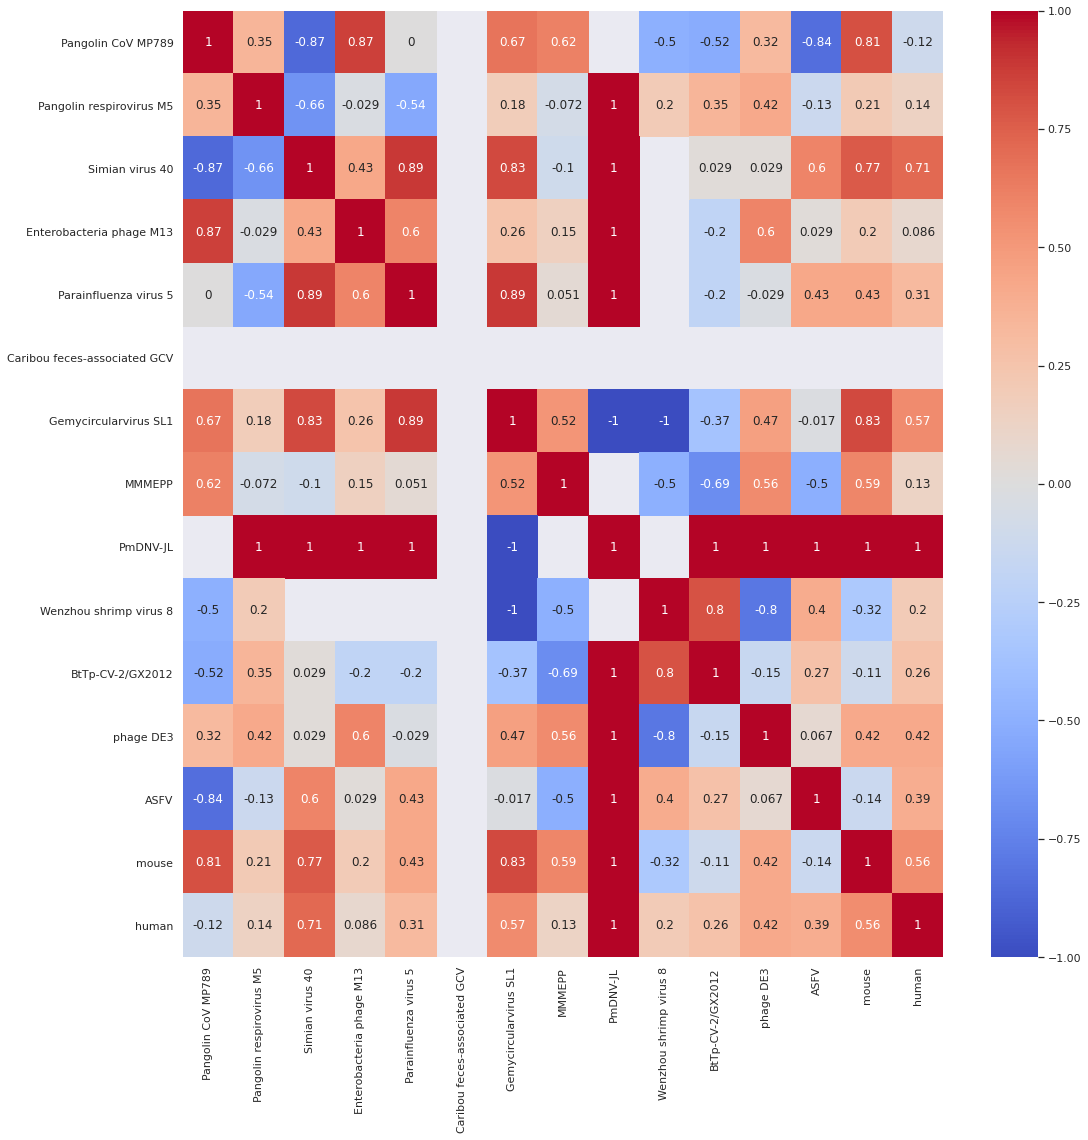

In [153]:
sns.set(rc={"figure.figsize":(16, 16)})
sns_plot=sns.heatmap(df_Xiao.corr(method='spearman'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Xiao_2020_viruses_spearman_{ITERATION}.png")

## PRJNA610466

In [154]:
df_species=pd.read_csv(f'{BASE_PATH}PRJNA610466/general_plots/PRJNA610466_nt_k141_magicBLAST_species_df.csv')

In [155]:
df_species=df_species.drop(columns=['Unnamed: 0'])

In [156]:
df_mice = df_species[df_species['Name'].str.contains('mouse')]
df_human = df_species[df_species['Name'].str.contains('human')]

In [157]:
df_Li=df[df["BioProject"] == 'PRJNA610466'] 

In [158]:
df_Li=df_Li[~df_Li.SRA.str.contains("SRR11306687")]

In [159]:
df_Li=df_Li.reindex([41,40,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58])

In [160]:
assert df_Li['SRA'].tolist()==df_mice['SRA'].tolist()

In [161]:
df_Li=df_Li.drop(columns=['BioProject','SRA'])

In [162]:
col_list=df_Li.columns.values.tolist()

In [163]:
col_codes=[]
for c in col_list:
    col_codes.append(c.split()[0])
df_Li.columns=col_codes

In [164]:
x_labels=list(df_Li.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
df_Li.columns=x_codes

In [165]:
df_Li['mouse']=df_mice['count'].tolist()
df_Li['human']=df_human['count'].tolist()

In [166]:
df_Li=df_Li.replace(0,np.nan).dropna(axis=1,how="all")

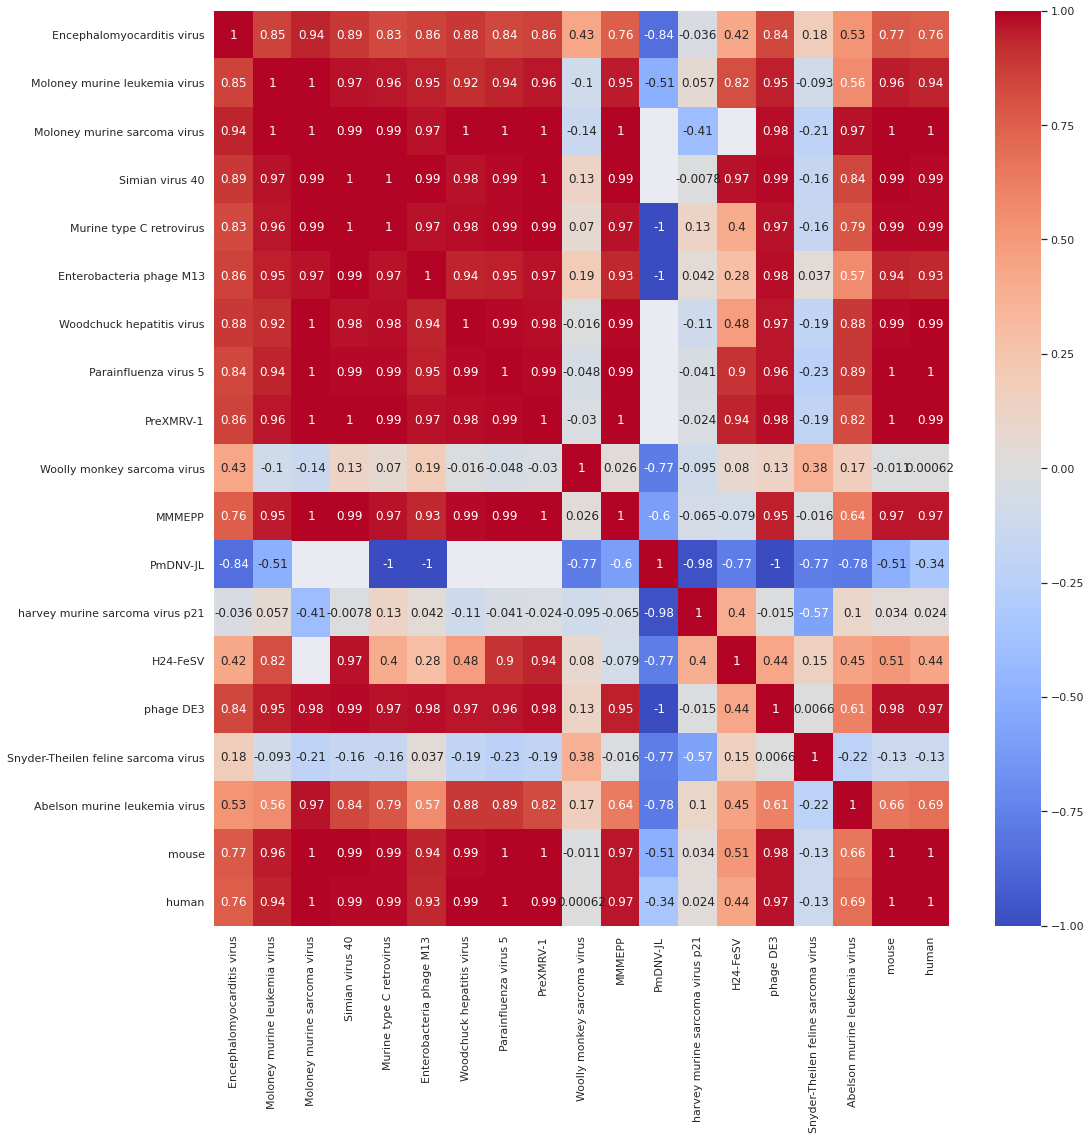

In [167]:
sns.set(rc={"figure.figsize":(16, 16)})
sns_plot=sns.heatmap(df_Li.corr(method='pearson'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Li_2020_viruses_pearson_{ITERATION}.png")

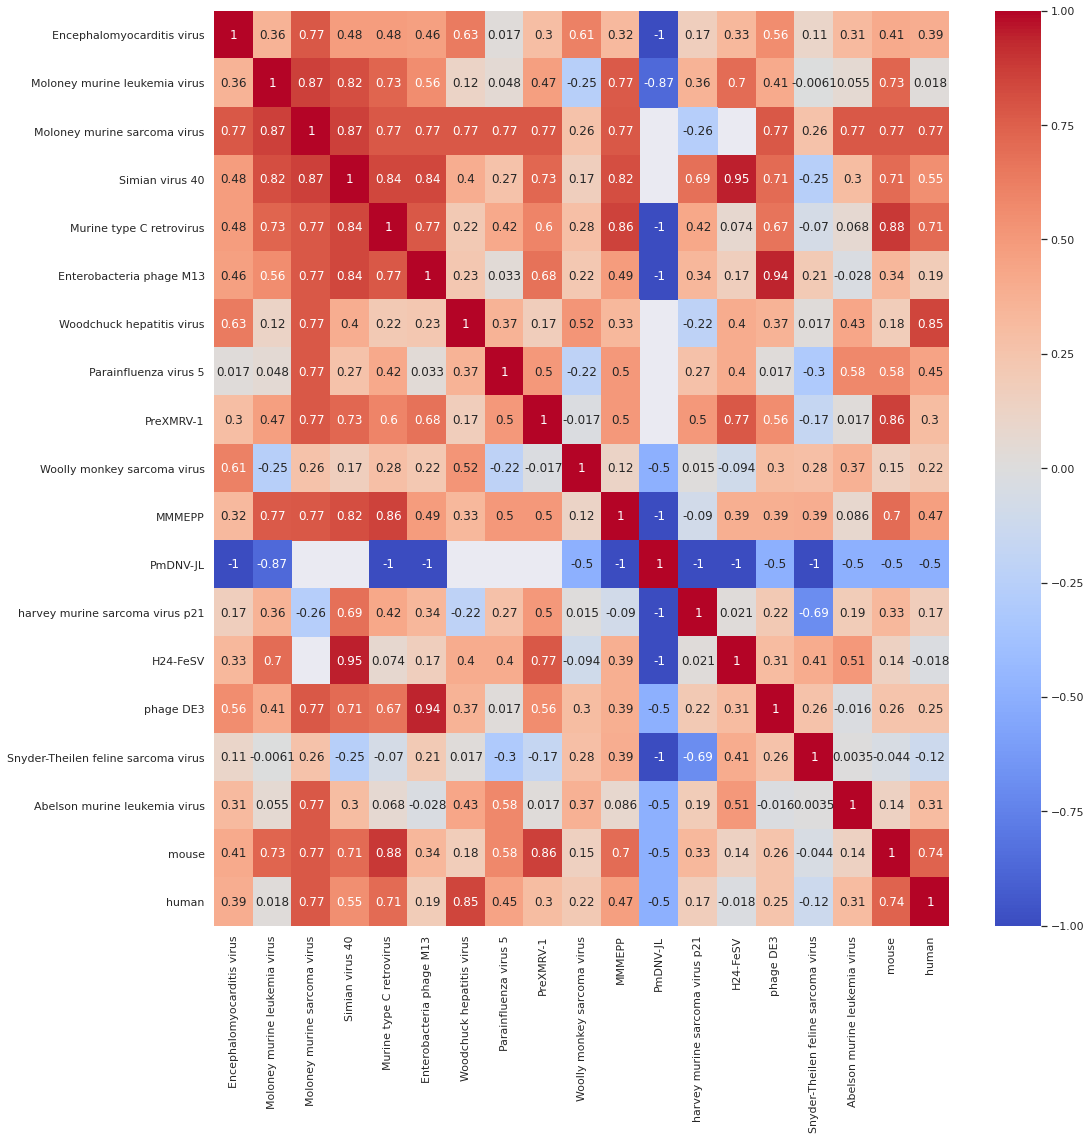

In [168]:
sns.set(rc={"figure.figsize":(16, 16)})
sns_plot=sns.heatmap(df_Li.corr(method='spearman'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Li_2020_viruses_spearman_{ITERATION}.png")

## PRJNA606875

In [169]:
df_species=pd.read_csv(f'{BASE_PATH}PRJNA606875/general_plots/PRJNA606875_nt_k141_magicBLAST_species_df.csv')

In [170]:
df_species=df_species.drop(columns=['Unnamed: 0'])

In [171]:
df_mice = df_species[df_species['Name'].str.contains('mouse')]
df_human = df_species[df_species['Name'].str.contains('human')]

In [172]:
df_Lam=df[df["BioProject"] == 'PRJNA606875'] 

In [173]:
assert df_Lam['SRA'].tolist()==df_mice['SRA'].tolist()

In [174]:
df_Lam=df_Lam.drop(columns=['BioProject','SRA'])

In [175]:
col_list=df_Lam.columns.values.tolist()

In [176]:
col_codes=[]
for c in col_list:
    col_codes.append(c.split()[0])
df_Lam.columns=col_codes

In [177]:
x_labels=list(df_Lam.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
df_Lam.columns=x_codes

In [178]:
df_Lam['mouse']=df_mice['count'].tolist()
df_Lam['human']=df_human['count'].tolist()

In [179]:
df_Lam=df_Lam.replace(0,np.nan).dropna(axis=1,how="all")

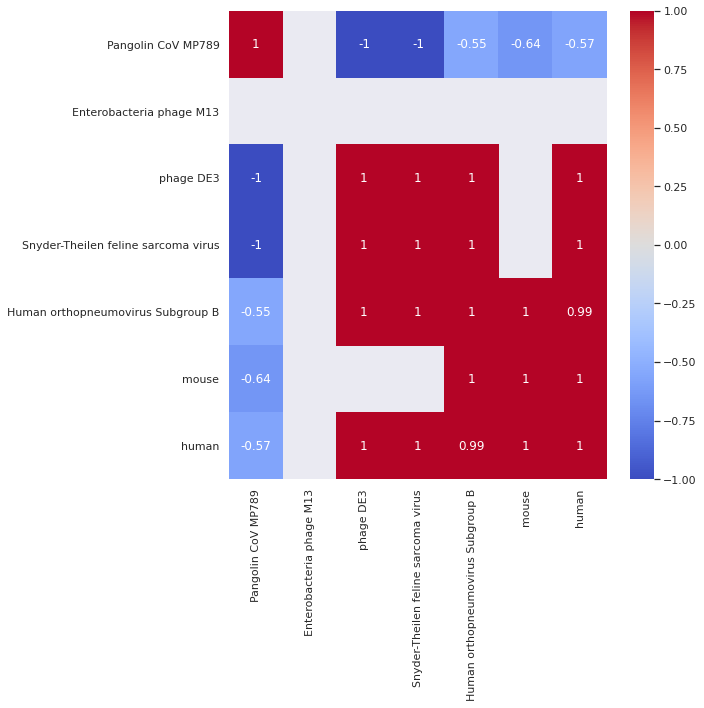

In [180]:
sns.set(rc={"figure.figsize":(10, 10)})
sns_plot=sns.heatmap(df_Lam.corr(method='pearson'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Lam_2020_viruses_pearson_{ITERATION}.png")

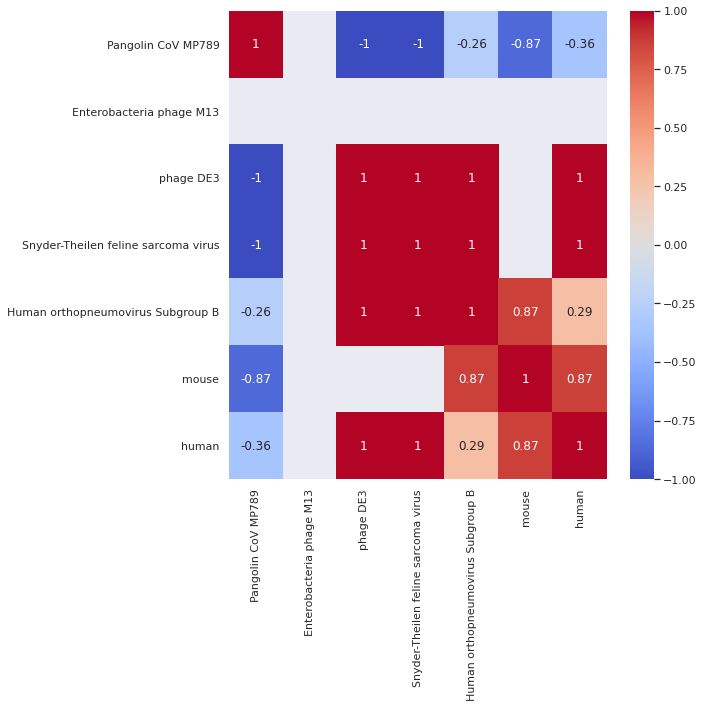

In [181]:
sns.set(rc={"figure.figsize":(10, 10)})
sns_plot=sns.heatmap(df_Lam.corr(method='spearman'),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.tight_layout()
fig.savefig(PLOT_PATH+f"Lam_2020_viruses_spearman_{ITERATION}.png")